In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Импортируем даные

In [2]:
url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
df = pd.read_csv(url, index_col =0)

In [3]:
df.head(10)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
6,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
7,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
8,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
9,EWR,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
10,EWR,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


#### Рассмотрим количество уникальных значений в некоторых категориях

Text(0.5, 1.0, 'Количество уникальных значений')

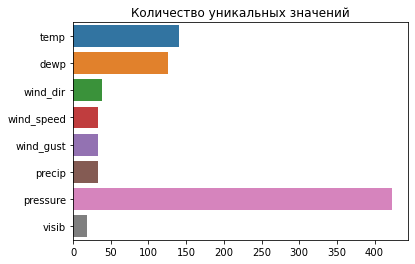

In [4]:
unique_values = [] 
for col in ['temp','dewp','wind_dir','wind_speed','wind_gust','precip','pressure','visib']:
    un=df[col].unique()
    unique_values.append(un.size)
sns.barplot(x=unique_values, y = ['temp','dewp','wind_dir','wind_speed','wind_gust','precip','pressure','visib'])
plt.title('Количество уникальных значений')

Здесь мы можем заметить, что значений давления, температуры и точек росы много, но это не удивительно, ведь эти значения часто меняются. Мы можем попробовать рассмотреть распределения этих величин.

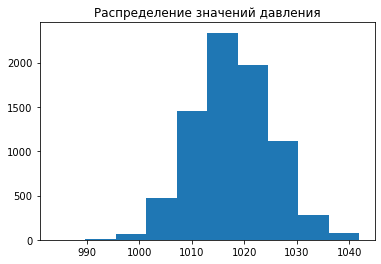

In [5]:
plt.hist(df['pressure'])
plt.title("Распределение значений давления")
plt.show()

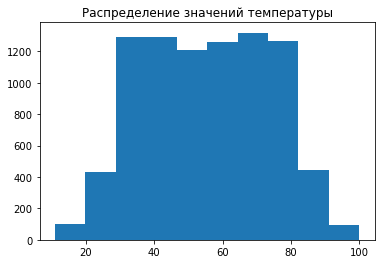

In [6]:
plt.hist(df['temp'])
plt.title("Распределение значений температуры")
plt.show()

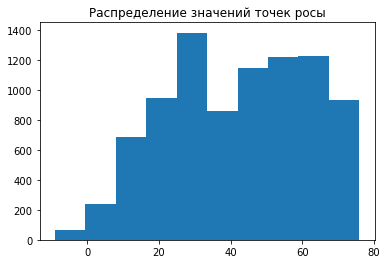

In [7]:
plt.hist(df['dewp'])
plt.title("Распределение значений точек росы")
plt.show()

Выше можем наблюдать распределения значений интересовавших нас величин. Мы можем проследить некоторую тенденцию, но, вероятно, значения просто стремятся к некоторому среднему значению, которое не влияет на задержки. В таком случае построим тепловую карту матрицы ковариаций для разных показателей и проследим, коррелируются ли вышеуказанные величины.

In [8]:
cor = df.corr()

In [9]:
cor['year'] = cor['year'].fillna(0)

In [10]:
cor.loc['year'] = cor.loc['year'].fillna(0)

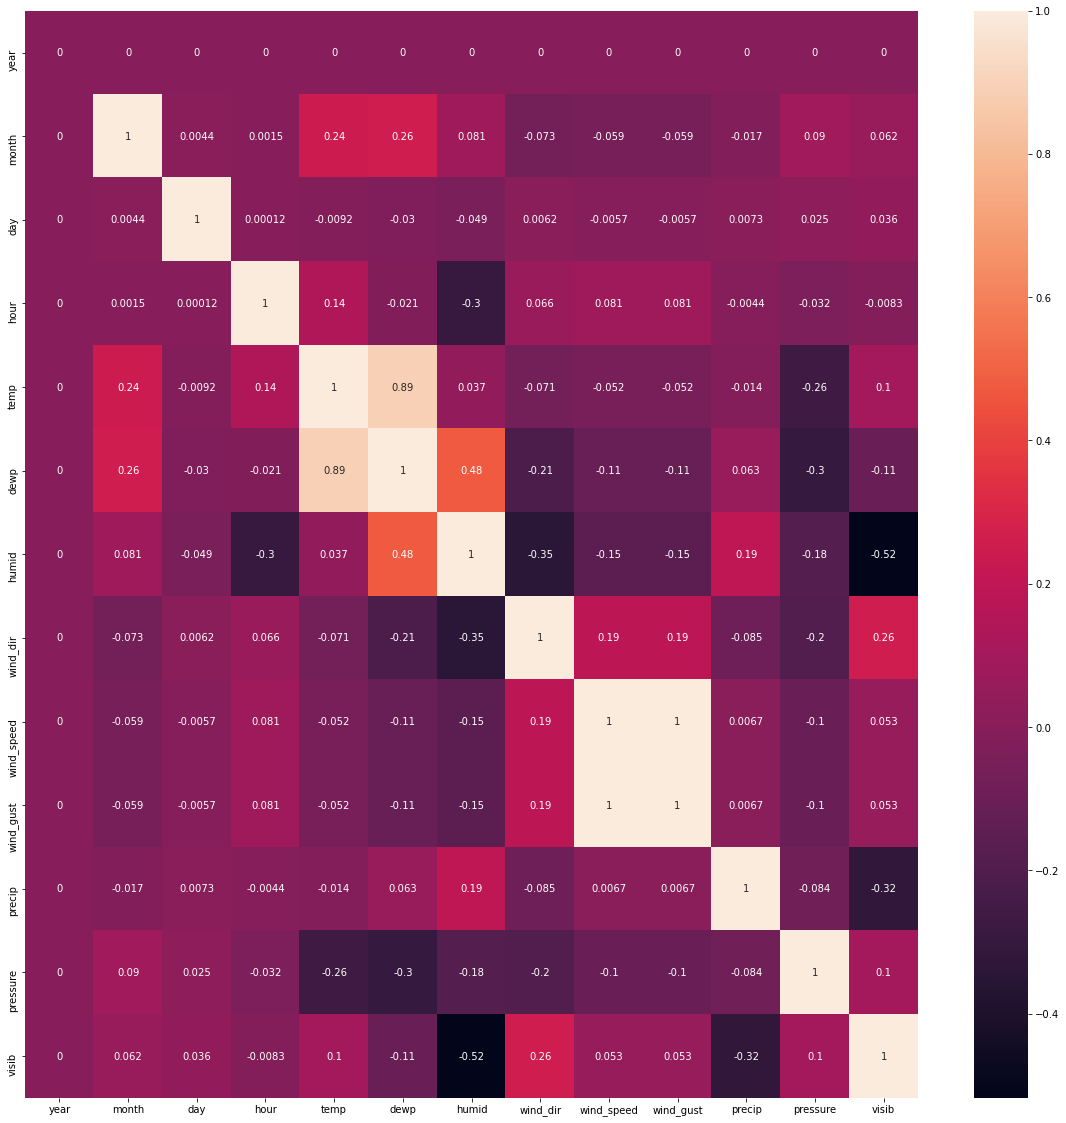

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(data=cor, annot=True)
plt.show()

Заметим, что давление особо ни с чем не коррелируется (за исключением температуры и точки росы, но это очевидный физический
факт). Так же температура коррелируется с месяцем, что тоже объяснимо. Однако, можно заметить некоторую корреляцию
с порывами ветра. Построим график, чтобы оценить зависимость.

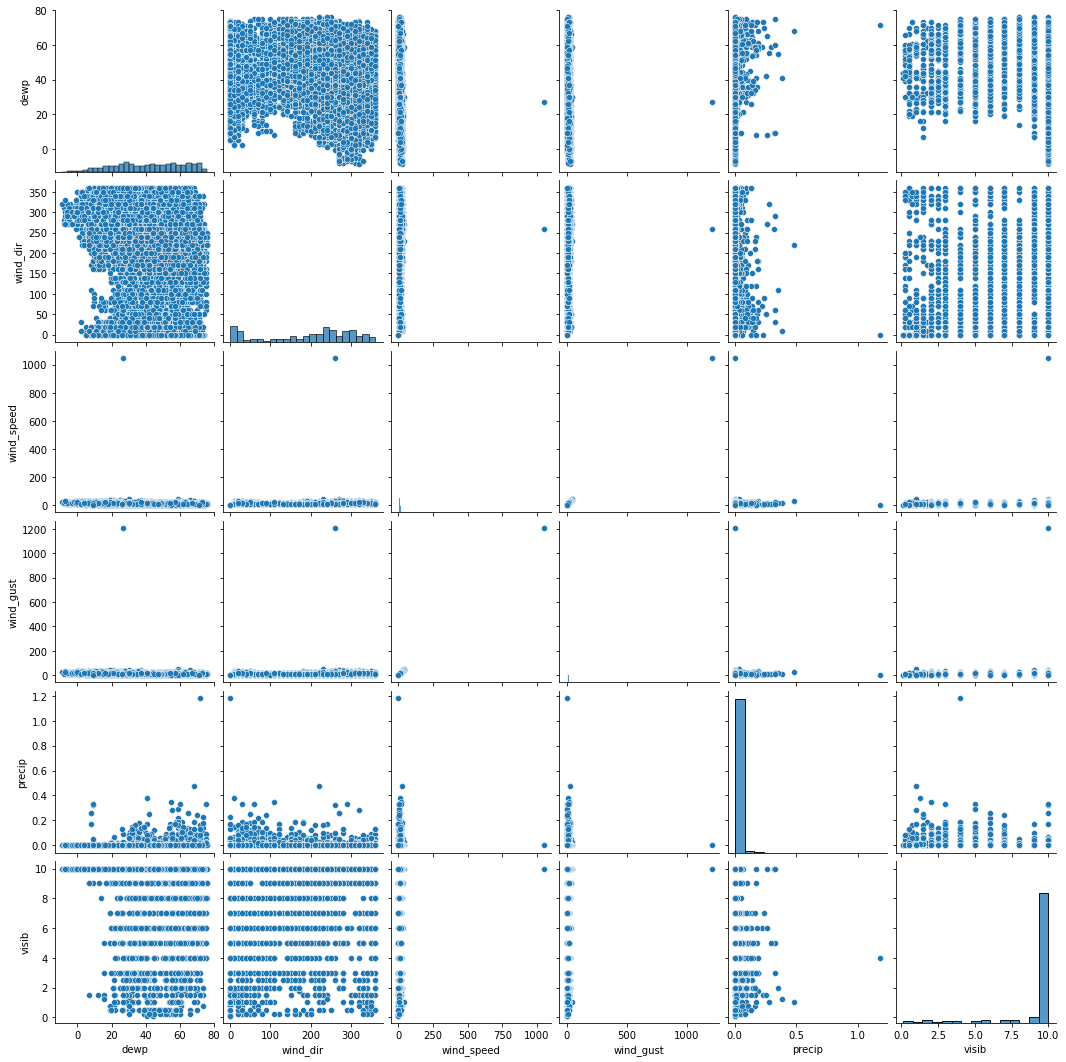

In [23]:
df_sample = df[['dewp','wind_dir','wind_speed','wind_gust','precip','visib']]
sample_size = 8719
sns.pairplot(df_sample.sample(sample_size))
plt.show()

Отсюда мы можем сделать некоторые выводы:

Температура, давление, направление ветра и видимость существенно не влияют на задержки, так как при задержках встречается полный диапазон значений.

Существенно влияют на задержки осадки и скорость ветра (но в этом случае могут быть исключения при низкой влажности и высокой видимости).

На задержки влияют высокие осадки за исключением случаев с хорошей видимостью и отсутствием ветра.

Влияние оказывает сила порыва ветра за исключением случаев отсутствия осадков и хорошей видимости.

Точка росы не оказывает влияния, за исключением того, что при низком показателе необходимы хорошая видимость, мало осадков и определённое направление ветра. 

### Вероятно, дело может быть в определённой дате

In [49]:
df['date'] =  df['month']*100 + df['day']
exc = df[['date', 'origin']]
exc.tail()

,date,origin
8715,902.0,JFK
8716,1023.0,JFK
8717,1023.0,JFK
8718,1217.0,JFK
8719,822.0,LGA


In [66]:
lga = df.loc[df['origin'] == 'LGA']
lga.shape[0]

1

In [67]:
jfk = df.loc[df['origin'] == 'JFK']
jfk.shape[0]

9

In [68]:
ewr = df.loc[df['origin'] == 'EWR']
ewr.shape[0]

8709

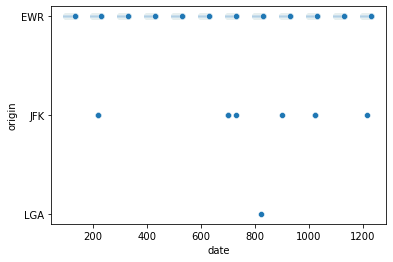

In [51]:
sns.scatterplot(x=exc['date'], y=exc['origin'])
#plt.xticks([0,1,2,3], [20130101,20130401,20130701,20131001])
plt.show()

На данном графике нет какой-то даты, на которую пришлись задержки сразу в трёх аэропортах. Но можно заметить, что подавляющее число задержек приходится на превый аэропорт. Либо он географически расположен в не самом удачном месте, о чём мы можем судить по погодным данным, либо просто плохо организован.